# Naive Bayes Project

### Derek Lilienthal

<b>Introduction</b> <br>
This report uses Naive Bayes Algorithm to predict if someone has income above or below $50,000. <br> The data is from the 1994-census-summary. <br> The dataset consists of 16 columns. Most of which is categorical and some are numeric

<h2> Data Input and Preprocessing </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # For converting text to numeric
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import graphviz
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(font_scale=2)
sns.set(color_codes=True)

In [2]:
# Import the data
url = 'https://raw.githubusercontent.com/grbruns/cst383/master/1994-census-summary.csv'
df = pd.read_csv(url)

In [3]:
df = df.convert_dtypes() # Convert the Dataset into Integers and Strings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   usid            32561 non-null  Int64 
 1   age             32561 non-null  Int64 
 2   workclass       30725 non-null  string
 3   fnlwgt          32561 non-null  Int64 
 4   education       32561 non-null  string
 5   education_num   32561 non-null  Int64 
 6   marital_status  32561 non-null  string
 7   occupation      30718 non-null  string
 8   relationship    32561 non-null  string
 9   race            32561 non-null  string
 10  sex             32561 non-null  string
 11  capital_gain    32561 non-null  Int64 
 12  capital_loss    32561 non-null  Int64 
 13  hours_per_week  32561 non-null  Int64 
 14  native_country  31978 non-null  string
 15  label           32561 non-null  string
dtypes: Int64(7), string(9)
memory usage: 4.2 MB


In [4]:
df.head()

,usid,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,1,39,State_gov,77516,Bachelors,13,Never_married,Adm_clerical,Not_in_family,White,Male,2174,0,40,United_States,<=50K
1,2,50,Self_emp_not_inc,83311,Bachelors,13,Married_civ_spouse,Exec_managerial,Husband,White,Male,0,0,13,United_States,<=50K
2,3,38,Private,215646,HS_grad,9,Divorced,Handlers_cleaners,Not_in_family,White,Male,0,0,40,United_States,<=50K
3,4,53,Private,234721,11th,7,Married_civ_spouse,Handlers_cleaners,Husband,Black,Male,0,0,40,United_States,<=50K
4,5,28,Private,338409,Bachelors,13,Married_civ_spouse,Prof_specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.describe().round(2)

,usid,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.0,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,16281.0,38.58,189778.37,10.08,1077.65,87.30,40.44
std,9399.7,13.64,105549.98,2.57,7385.29,402.96,12.35
min,1.0,17.00,12285.00,1.00,0.00,0.00,1.00
25%,8141.0,28.00,117827.00,9.00,0.00,0.00,40.00
50%,16281.0,37.00,178356.00,10.00,0.00,0.00,40.00
75%,24421.0,48.00,237051.00,12.00,0.00,0.00,45.00
max,32561.0,90.00,1484705.00,16.00,99999.00,4356.00,99.00


<b>usid</b> and <b>fnlwgt</b> are not useful for what we are trying to do so i will remove them from the dataset

In [6]:
df.drop(columns=['usid','fnlwgt'], inplace=True)
# Check to make sure it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  Int64 
 1   workclass       30725 non-null  string
 2   education       32561 non-null  string
 3   education_num   32561 non-null  Int64 
 4   marital_status  32561 non-null  string
 5   occupation      30718 non-null  string
 6   relationship    32561 non-null  string
 7   race            32561 non-null  string
 8   sex             32561 non-null  string
 9   capital_gain    32561 non-null  Int64 
 10  capital_loss    32561 non-null  Int64 
 11  hours_per_week  32561 non-null  Int64 
 12  native_country  31978 non-null  string
 13  label           32561 non-null  string
dtypes: Int64(5), string(9)
memory usage: 3.6 MB


<h4> Null or Missing Data </h4>

In [7]:
# These are the columns that contain missing data
for col in df.columns[(df.isna().sum() > 0)].tolist():
    print(col)

workclass
occupation
native_country


Only the columns <b> workclass, occupation, </b> and <b> native_country </b> have missing values

Below is a graph of the value counts of the three columns in the dataset where there is missing data

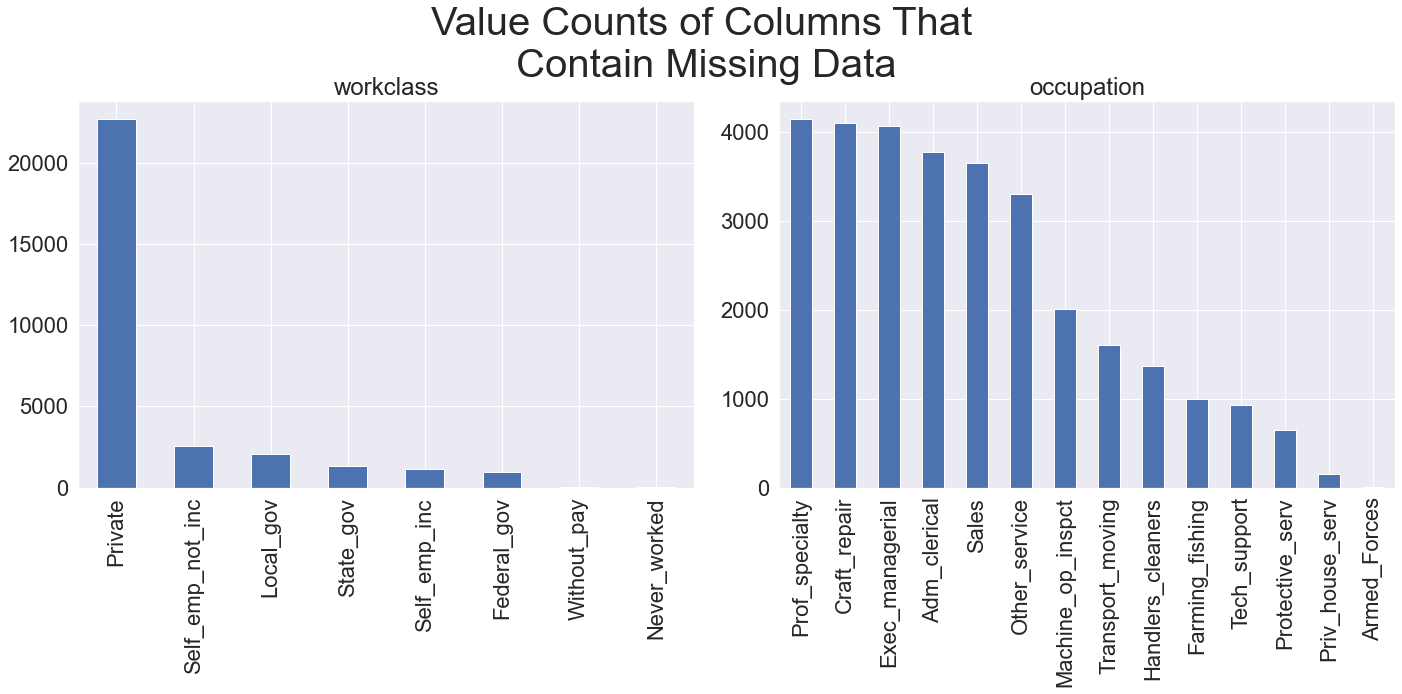

In [8]:
sns.set(font_scale=2)
top = ['workclass','occupation']
bottom = ['native_country']
#plt.subplots_adjust(wspace=1, hspace=1, right=2)
i = 1
for col in top:
    plt.subplot(1, len(top), i)
    values_list = df[col].value_counts().tolist()
    df[col].value_counts().plot.bar()
    plt.title(col)
    i += 1
plt.tight_layout()
plt.suptitle('Value Counts of Columns That\n Contain Missing Data', fontsize=40)
plt.subplots_adjust(top=0.85);

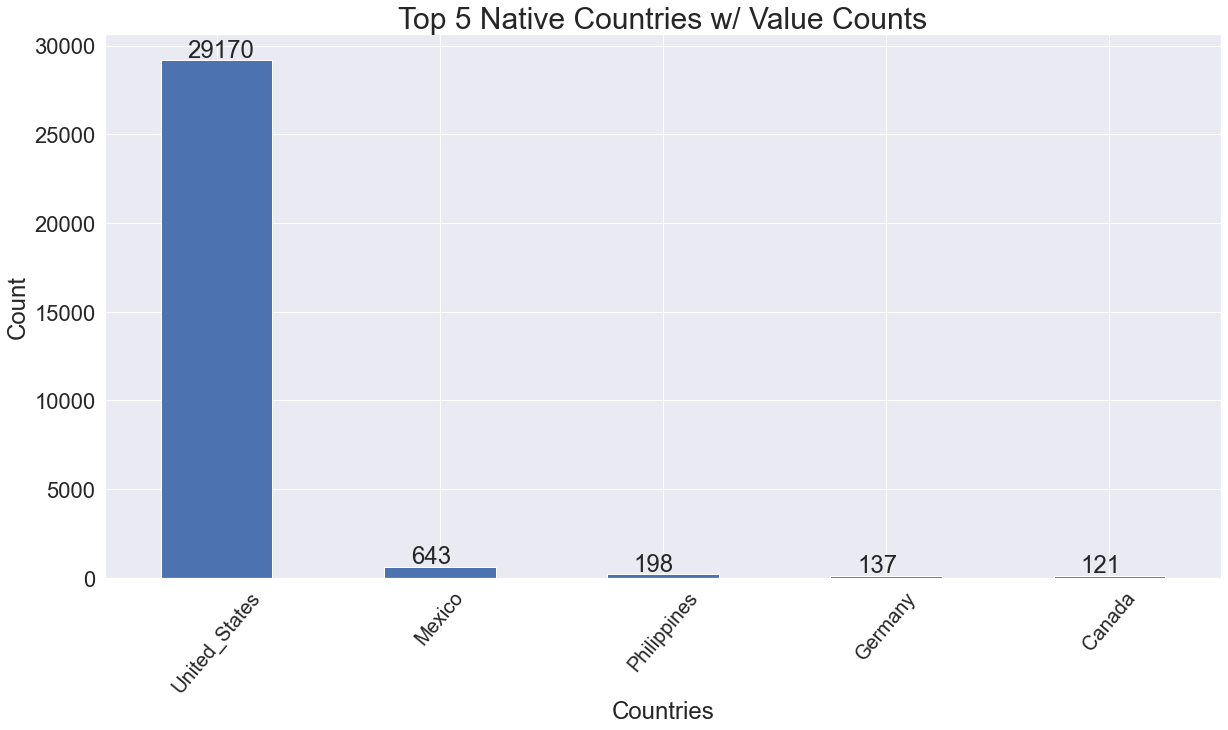

In [9]:
values_list = df[bottom].value_counts().head().tolist() # Creates a list of the top 5 value counts

ax = df['native_country'].value_counts().head().plot(kind='bar')

for i, col in enumerate(ax.patches):
    ax.text(col.get_x()+.12, col.get_height() + 200, values_list[i])
plt.title('Top 5 Native Countries w/ Value Counts', fontsize=30)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.tick_params(axis='x', labelsize=20, rotation=50);

Below shows how much missing total data is in the dataset

In [10]:
df.isna().sum()

age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
label                0
dtype: int64

In [11]:
# Get the rows in the dataset where there is a null value in any of the columns
temp = df.loc[df.isna().any(axis=1) == True].shape[0] 
print('There are {} number of rows in the dataset that contain a missing value'.format(temp))
print('The portion of rows in the dataset that contain a missing value is {:.2f}%'.format(temp / df.shape[0]))

There are 2399 number of rows in the dataset that contain a missing value
The portion of rows in the dataset that contain a missing value is 0.07%


Below shows how many rows in the dataset have <b><em>both</em></b> a null value for the workclass and occupation

In [12]:
df.loc[(df['workclass'].isna()) & (df['occupation'].isna())].shape[0]

1836

Because each value missing value in the workclass also has a missing value in the occupation column, it makes sense to remove all of those rows. And because there is only 7 rows <em>(1839 - 1832)</em> in the dataset that has has a workclass but no occupation, i will remove those as well. <br>

In [13]:
df.drop(index = df.loc[df['workclass'].isna()].index, inplace=True)
df.drop(index = df.loc[df['occupation'].isna()].index, inplace=True)

Because we cannot assume a native country for the rows that contain that missing value, it is best that we completely remove all those entries all together. 

In [14]:
df.drop(index = df.loc[df['native_country'].isna()].index, inplace=True)

In [15]:
# Check to make sure it worked
df.isna().sum().sum()

0

<h2> Data Exploration and Visualization </h2>

Below is a graph that shows how many unique values there are in each categorical column that is represented as a string. 

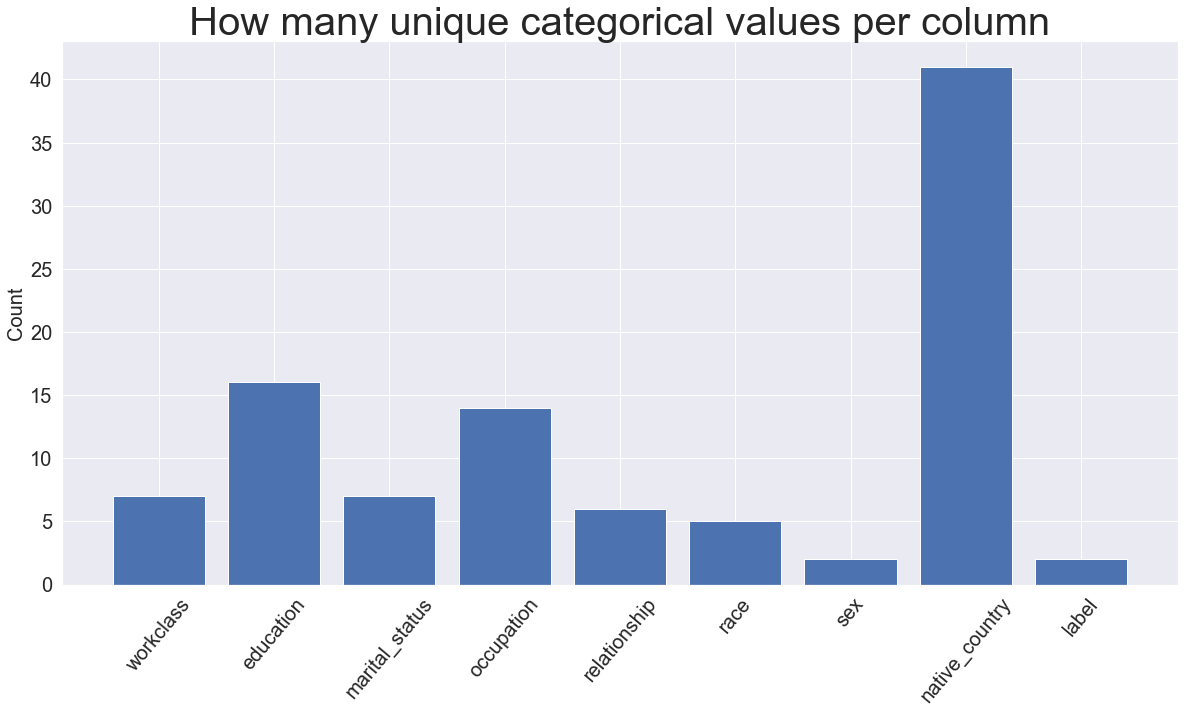

In [16]:
temp_dict = {}
for col in df.columns:
    if df[col].dtypes == 'string':
        temp_dict[col] = df[col].unique().size

plt.bar(temp_dict.keys(),temp_dict.values())
plt.title('How many unique categorical values per column', fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=50);

Below is a graph that shows how many unique values there are in each numeric column.

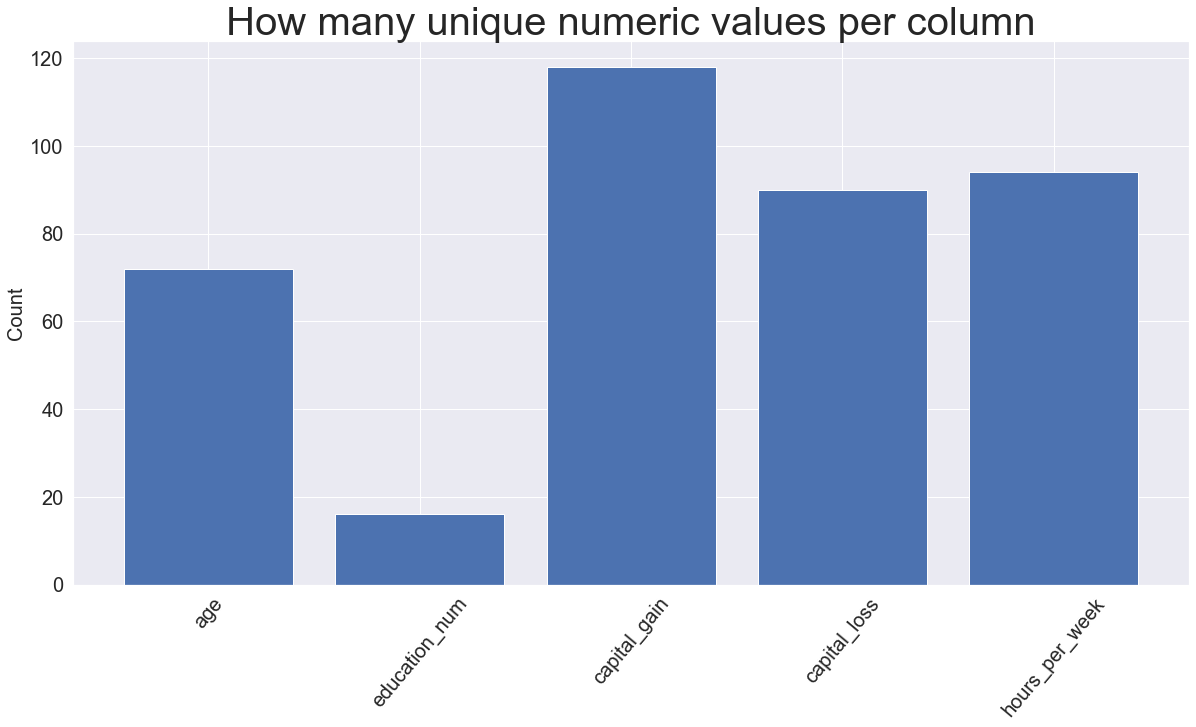

In [17]:
temp_dict = {}
for col in df.columns:
    if df[col].dtypes != 'string':
        temp_dict[col] = df[col].unique().size

plt.bar(temp_dict.keys(),temp_dict.values())
plt.title('How many unique numeric values per column', fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=50);

Below shows a box plot distribution of all the numeric data

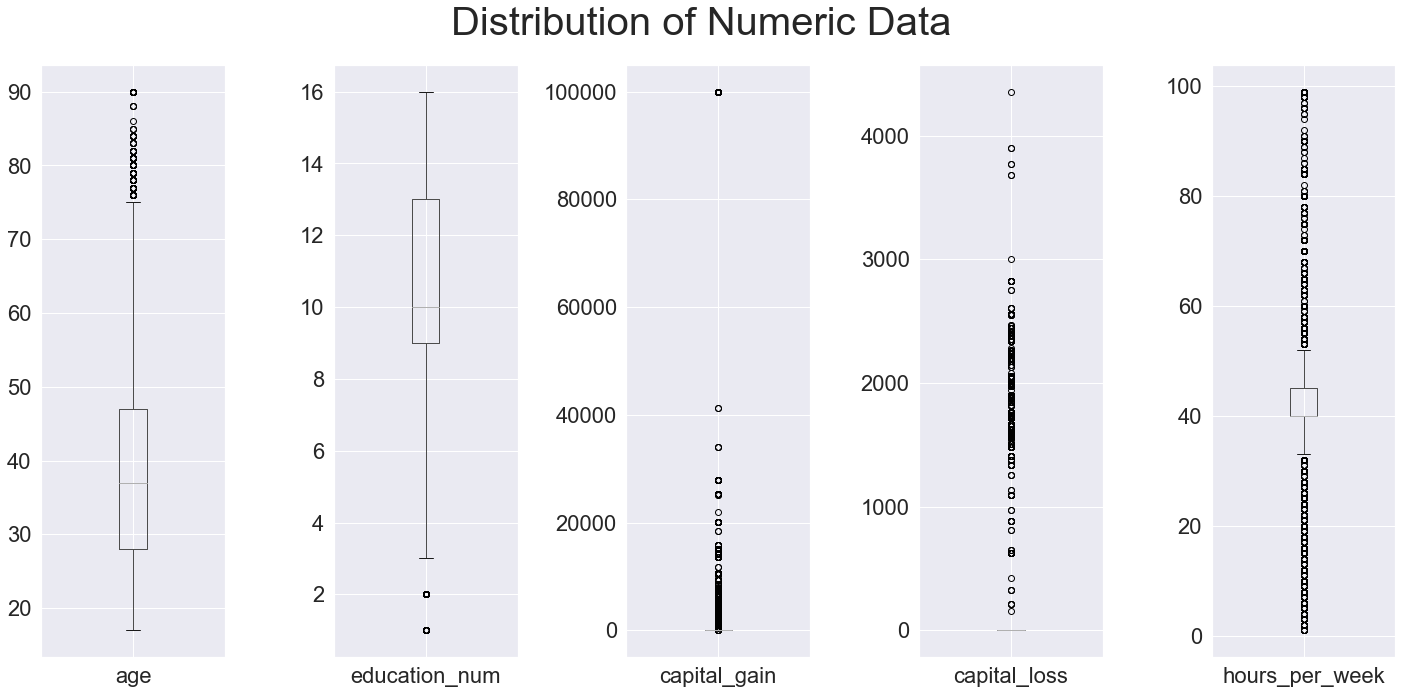

In [18]:
sns.set(font_scale=2)
cat_columns = ['age','education_num','capital_gain','capital_loss','hours_per_week']
plt.subplots_adjust(wspace=1, hspace=1, right=2)
i = 1
for col in cat_columns:
    plt.subplot(1, len(cat_columns), i)
    df.boxplot([col])
    i += 1
plt.tight_layout()
plt.suptitle('Distribution of Numeric Data', fontsize=40)
plt.subplots_adjust(top=0.9);

There is at least 1 major outlier that strays from the rest in the <b> captial_gain </b> column. 

In [19]:
df.describe().round(2)

,age,education_num,capital_gain,capital_loss,hours_per_week
count,30162.00,30162.00,30162.00,30162.00,30162.00
mean,38.44,10.12,1092.01,88.37,40.93
std,13.13,2.55,7406.35,404.30,11.98
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,47.00,13.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,4356.00,99.00


Having a captial_gain of 99999 seems rather unusual because the second largest capital gain is more than 50k away.

In [20]:
# Count how many of those entries in the dataset have a 99999 captial gain
print('There are {} number of entries with a capital gain of 99999'.format(df.loc[df['capital_gain'] == 99999].shape[0]))

There are 148 number of entries with a capital gain of 99999


I will drop those entries 

In [21]:
df.drop(index = df.loc[df['capital_gain'] == 99999].index, inplace=True)
print('There are {} number of entries with a capital gain of 99999'.format(df.loc[df['capital_gain'] == 99999].shape[0]))

There are 0 number of entries with a capital gain of 99999


Below is the another distribution of all the numeric data

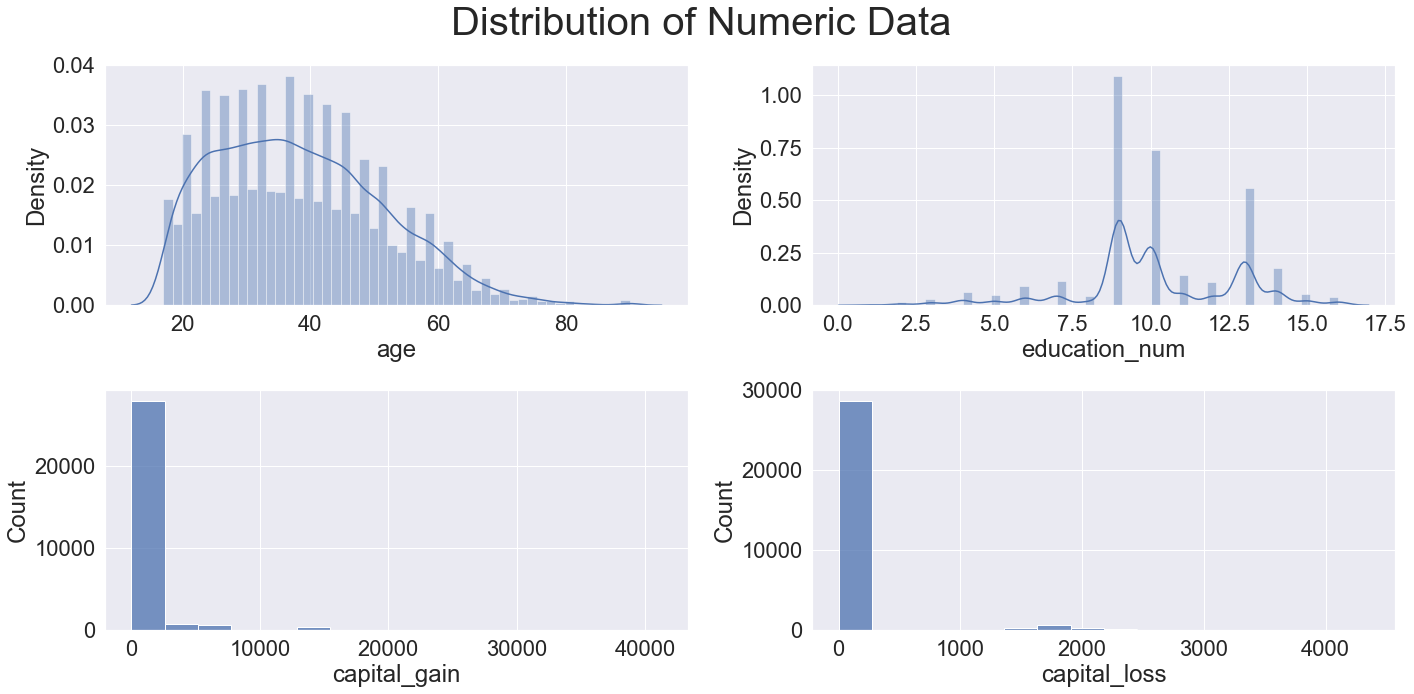

In [22]:
fig, axes = plt.subplots(2,2)
sns.distplot(df['age'], ax=axes[0,0])
sns.distplot(df['education_num'], ax=axes[0,1])
sns.histplot(df['capital_gain'], ax=axes[1,0])
sns.histplot(df['capital_loss'], ax=axes[1,1])
plt.tight_layout()
plt.suptitle('Distribution of Numeric Data', fontsize=40)
plt.subplots_adjust(top=0.9);

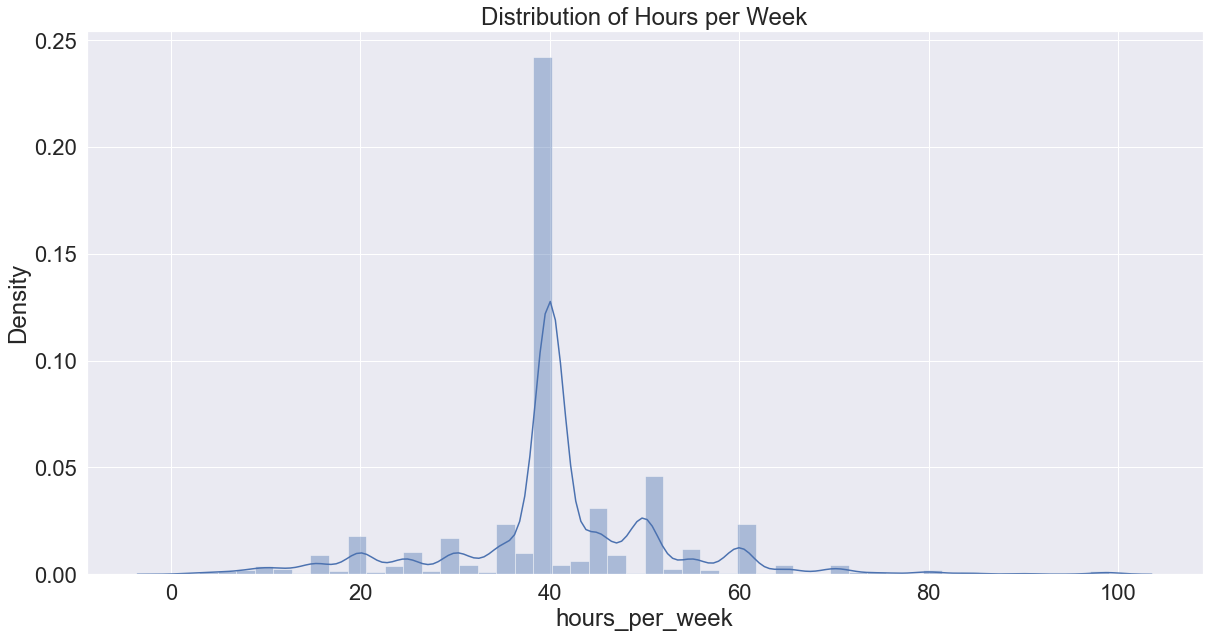

In [23]:
sns.distplot(df['hours_per_week'])
plt.title('Distribution of Hours per Week');

Below is a graph that shows the percentage of people who are not native to the U.S. and what percentage of those people have a capital gain. The plot below this one is people who's native country is not from the US but has a capital loss.

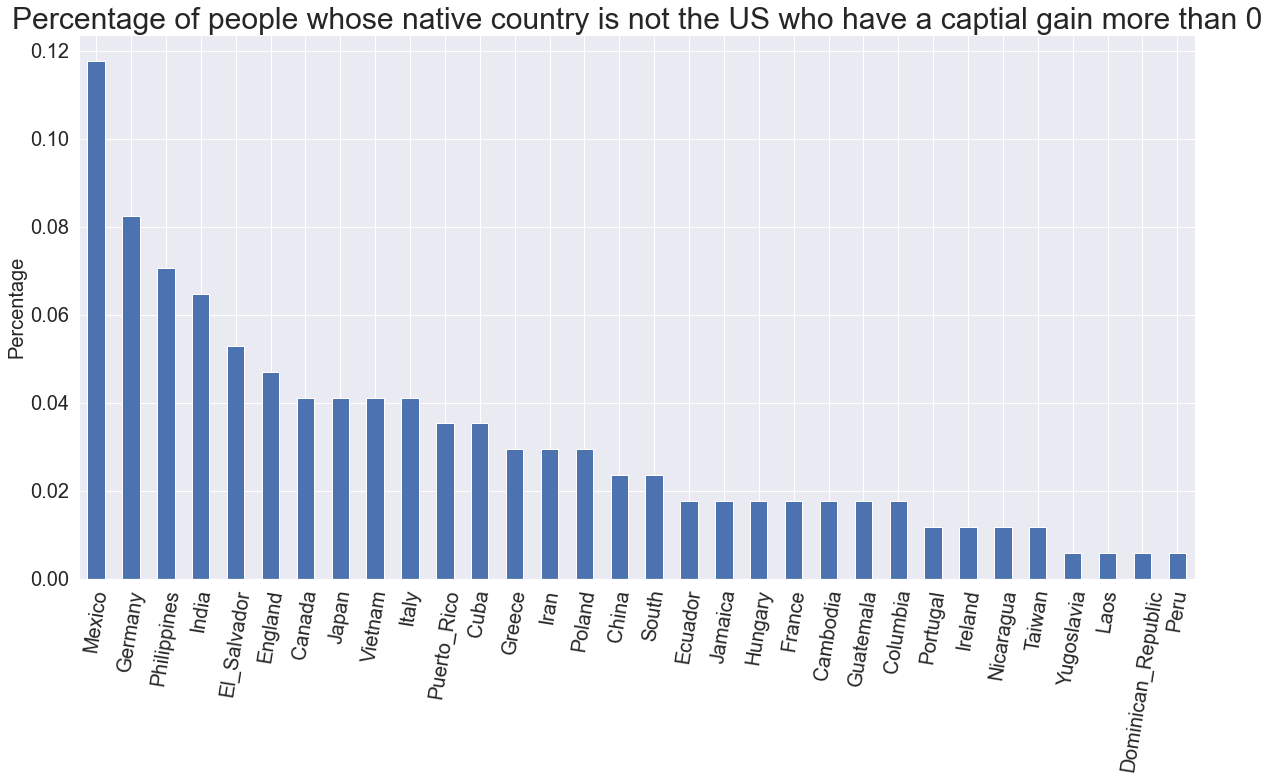

In [24]:
df.loc[(df['native_country'] != 'United_States') & (df['capital_gain'] != 0)]['native_country'].value_counts(normalize=True).plot.bar()
plt.title('Percentage of people whose native country is not the US who have a captial gain more than 0', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=81);

The county with the largest percentage of nationals with a captial gain is Mexico

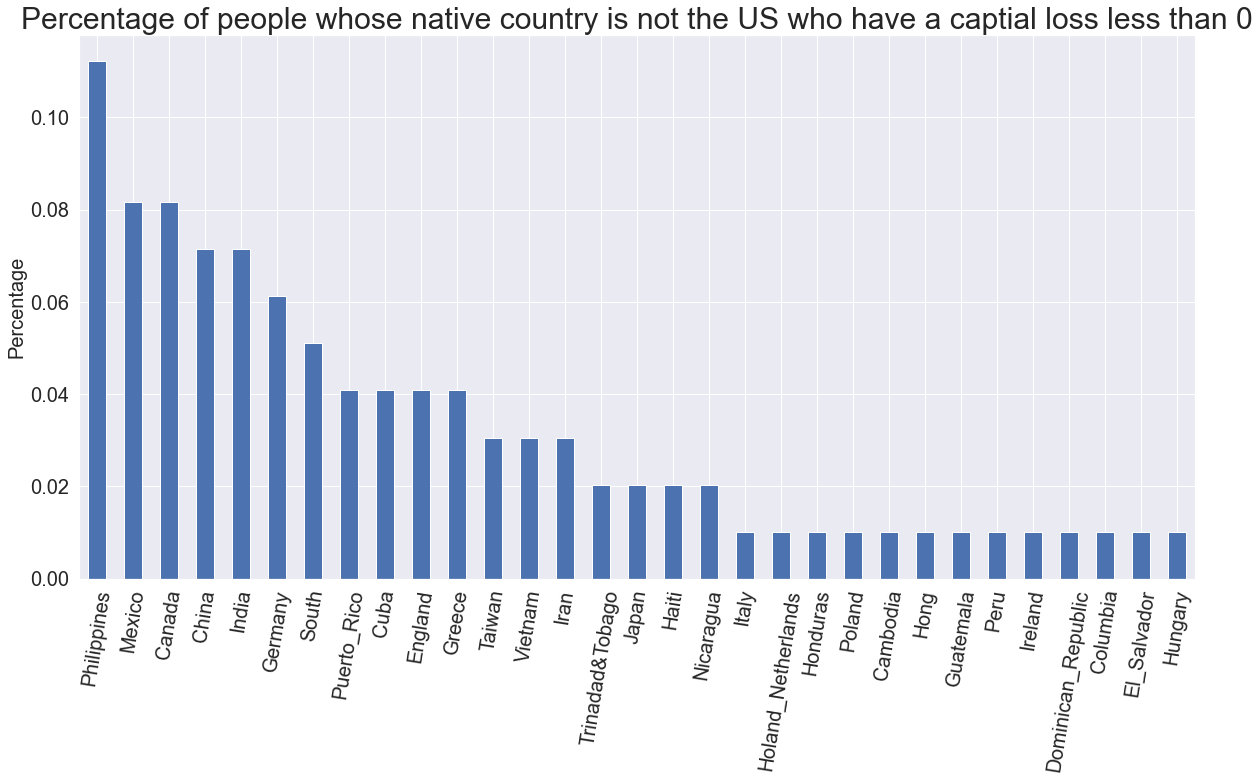

In [25]:
df.loc[(df['native_country'] != 'United_States') & (df['capital_loss'] != 0)]['native_country'].value_counts(normalize=True).plot.bar()
plt.title('Percentage of people whose native country is not the US who have a captial loss less than 0', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=81);

The county with the largest percentage of nationals with a captial loss is the Phillipines. 

The plot below shows:<br> <em>The percentages of number of years of education for people who make less than 50K a year </em>

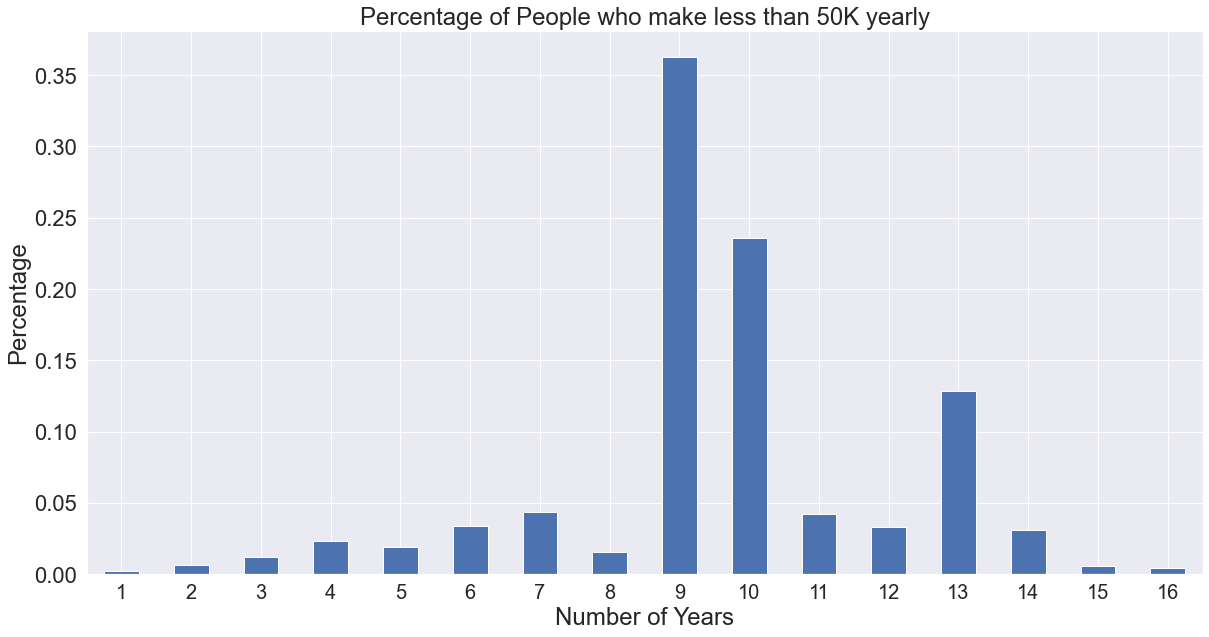

In [26]:
temp_df = df[['education_num','label']][df['label'] == '<=50K']
temp_df['education_num'].value_counts(normalize=True).sort_index().plot.bar()
plt.title('Percentage of People who make less than 50K yearly')
plt.xlabel('Number of Years')
plt.ylabel('Percentage')
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=0);

To interpret the graph, over 35% of people who make less than 50K a year have 9 years of education. 

The plot below shows the percentages of number of years of education for people who make <b>more</b> than 50K a year

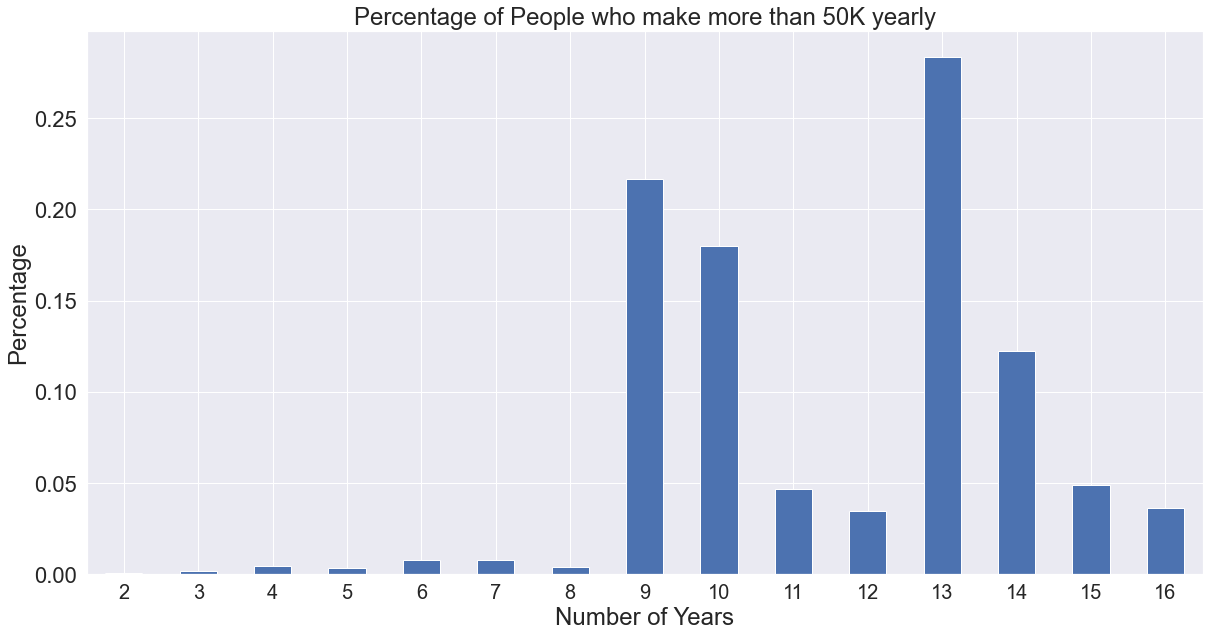

In [27]:
temp_df = df[['education_num','label']][df['label'] != '<=50K']
temp_df['education_num'].value_counts(normalize=True).sort_index().plot.bar()
plt.title('Percentage of People who make more than 50K yearly')
plt.xlabel('Number of Years')
plt.ylabel('Percentage')
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=0);

To interpret this graph, it looks like to make over 50K a year, you would at least need to be in high school. Something notable is that over 25% of people who make more than 50k a year have 13 years of education. Which implies they at least finished high school.

<h2> Data Preparation </h2>

Convert all the Categorical Data into Numeric Data

In [28]:
# Get all the columns that are not numeric
cat_cols = []
for col in df.columns:
    if df[col].dtypes == 'string':
        cat_cols.append(col)
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'label']

In [29]:
# Create a new dataframe so we don't modify the original
df2 = df.copy()

# Create a OrdinalEncorder Object
enc_workclass = OrdinalEncoder()
enc_education = OrdinalEncoder()
enc_marital_status = OrdinalEncoder()
enc_occupation = OrdinalEncoder()
enc_relationship = OrdinalEncoder()
enc_race = OrdinalEncoder()
enc_sex = OrdinalEncoder()
enc_native_country = OrdinalEncoder()
le_label = LabelEncoder()

# Create new columns in our dataframe with the transformed data
df2['workclass_n'] = enc_workclass.fit_transform(np.array(df2['workclass']).reshape(-1,1))
df2['education_n'] = enc_education.fit_transform(np.array(df2['education']).reshape(-1,1))
df2['marital_status_n'] = enc_marital_status.fit_transform(np.array(df2['marital_status']).reshape(-1,1))
df2['occupation_n'] = enc_occupation.fit_transform(np.array(df2['occupation']).reshape(-1,1))
df2['relationship_n'] = enc_relationship.fit_transform(np.array(df2['relationship']).reshape(-1,1))
df2['race_n'] = enc_race.fit_transform(np.array(df2['race']).reshape(-1,1))
df2['sex_n'] = enc_sex.fit_transform(np.array(df2['sex']).reshape(-1,1))
df2['native_country_n'] = enc_native_country.fit_transform(np.array(df2['native_country']).reshape(-1,1))
df2['label_n'] = le_label.fit_transform(df2['label'])
    
# Drop all the old columns 
df2 = df2.drop(cat_cols, axis='columns')
df2.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_n,education_n,marital_status_n,occupation_n,relationship_n,race_n,sex_n,native_country_n,label_n
0,39,13,2174,0,40,5.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0,0
1,50,13,0,0,13,4.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0,0
2,38,9,0,0,40,2.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0,0
3,53,7,0,0,40,2.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0,0
4,28,13,0,0,40,2.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0,0


In [30]:
#list(le_workclass.inverse_transform(np.arange(len(df2['workclass_n'].unique()))))

<b> FOR REFERENCE </b> <br>
Label: <br> 0: <b> &lt;=50K </b> <br>
1: <b> &gt;50K </b>

Below i am splitting the data into test and training data

In [31]:
target = 'label_n'
predictors = df2.columns[:df.shape[1]-1]

X = df2[predictors].values # X is the features in our dataset
y = df2[target].values   # y is the Labels in our dataset

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<h4> Baseline Accuracy </h4>

In [32]:
blind_prediction = np.median(y_train)
print("The baseline test accuracy is {:.2f}%".format((y_test - blind_prediction).mean()*100))

The baseline test accuracy is 24.61%


<h2> Model 1 </h2>

For the first model, i am using all predictors and am not adjusting any parameters.

In [33]:
# Train the model
model = GaussianNB().fit(X_train, y_train)

In [34]:
# Make predictions
y_predict = model.predict(X_test)

In [35]:
accuracy_score = accuracy_score(y_test, y_predict) 
print('The accuracy of the first model is {:.2f}%'.format((accuracy_score * 100)))

The accuracy of the first model is 80.86%


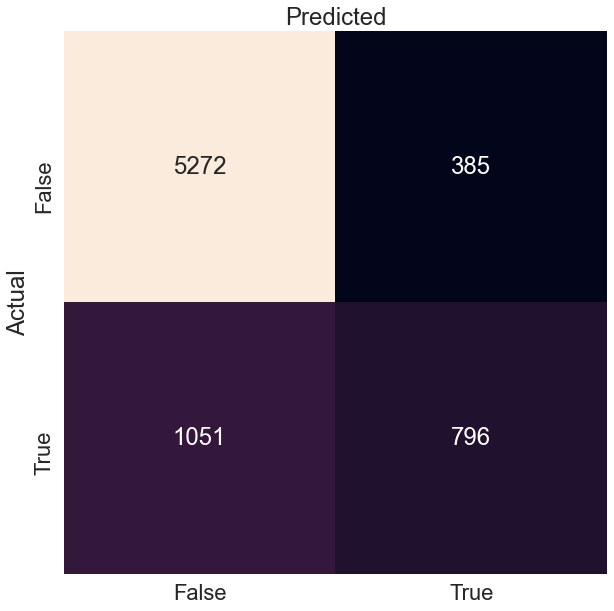

In [36]:
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['False','True'], yticklabels=['False','True'])
plt.title('Predicted')
plt.ylabel('Actual');

In [37]:
print('The Percision of the model is {:.2f}%'.format((mat[1,1] / (mat[0,1] + mat[1,1]))*100))
print('The Recall of the model is {:.2f}%'.format((mat[1,1] / (mat[1,0] + mat[1,1]))*100))

The Percision of the model is 67.40%
The Recall of the model is 43.10%


Below is the Learning Curve for Naive Bayes Classifier.

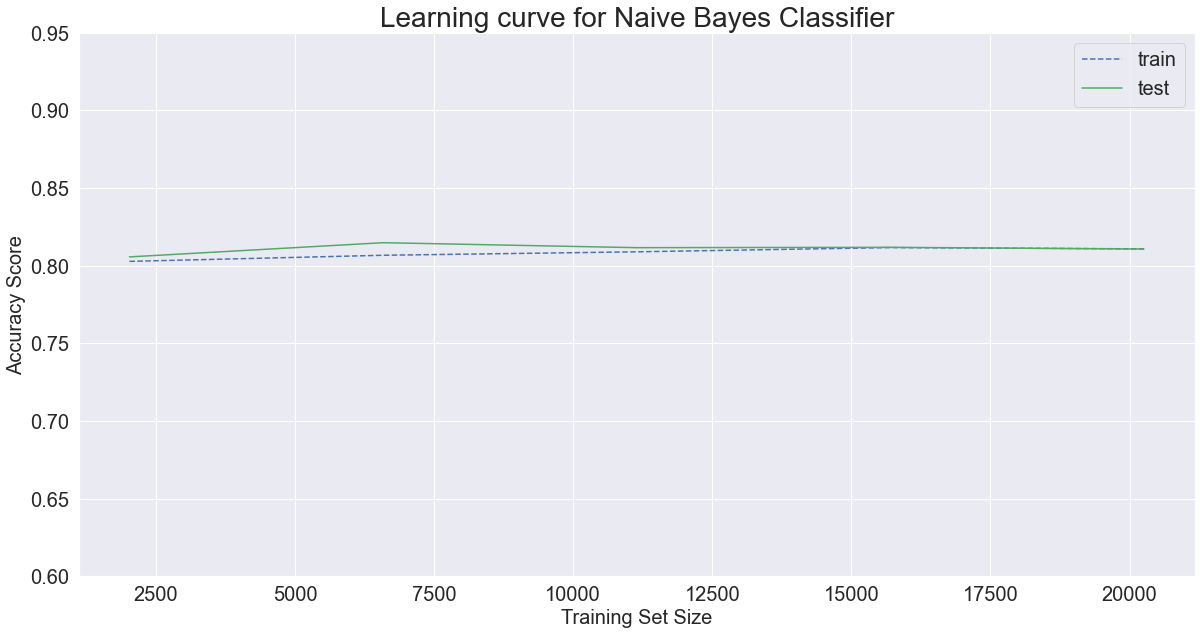

In [38]:
font_size=20

train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), X_train, y_train, cv=10, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean,'--', color="b", label='train')
plt.plot(train_sizes, test_scores_mean, label='test', color="g")
plt.xlabel('Training Set Size', fontsize=font_size)
plt.ylabel('Accuracy Score', fontsize=font_size)
plt.title('Learning curve for Naive Bayes Classifier', fontsize=font_size+8)
plt.yticks([0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95],fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.legend(fontsize=font_size);

As we can see from the graph above, the learning curve to train and predict Naive Bayes is really minimal. This is one of the benefits of using a Naive Bayes model. <br>
This graph also shows that Naive Bayes Classifier has very high bias.

#### Precision-Recall

Below is the Precision-Recall curve of the first model

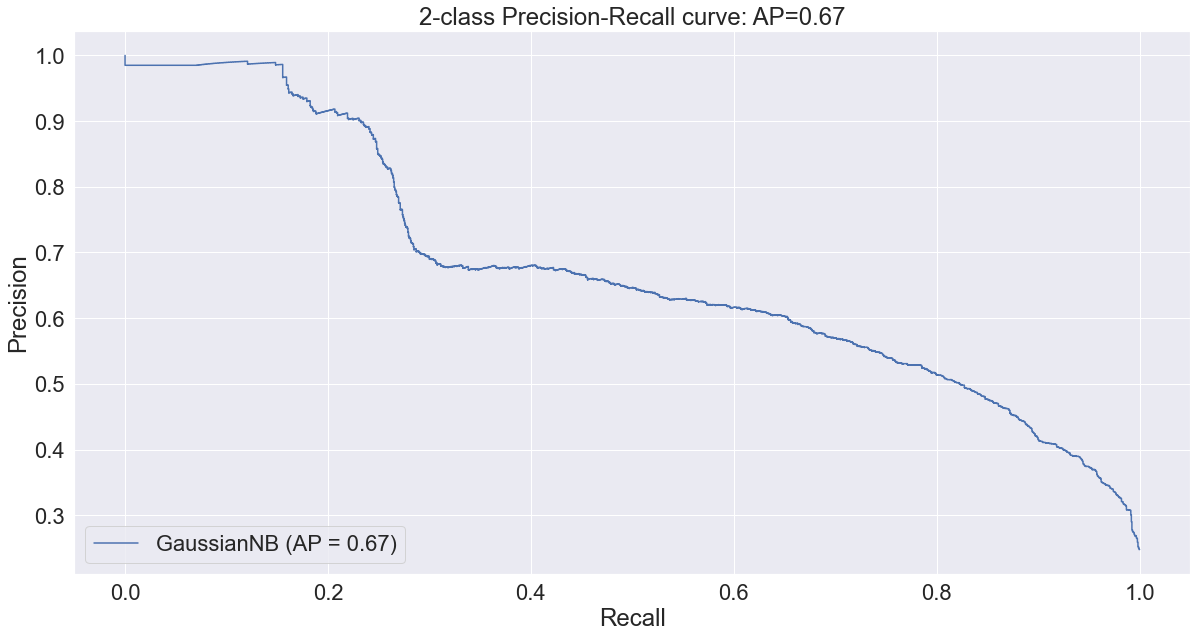

In [39]:
# Probability of all predictions
prob_50k = model.predict_proba(X_test)[:,1]

average_precision = average_precision_score(y_test, prob_50k)
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

<h2> Model 2 </h2>

In [40]:
# Naive Bayes Classifier
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [41]:
score = clf.score(X_test, y_test)
print('The accuracy of the second model is {:.2f}%'.format(score * 100))

The accuracy of the second model is 85.01%


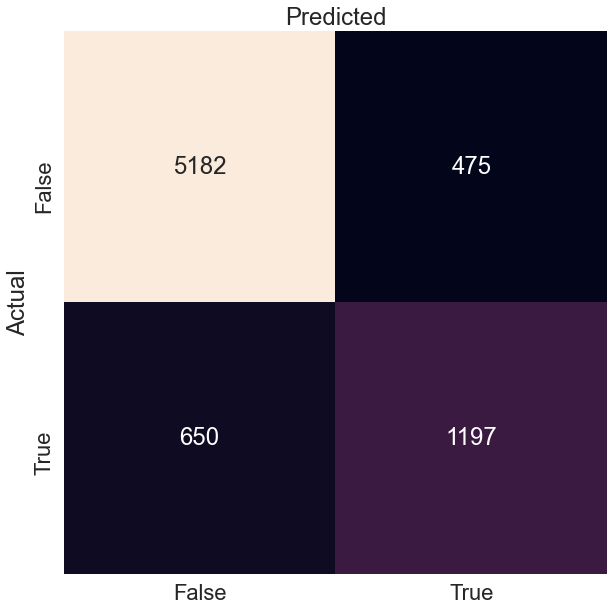

In [42]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['False','True'], yticklabels=['False','True'])
plt.title('Predicted')
plt.ylabel('Actual');

In [43]:
print('The Percision of the model is {:.2f}%'.format((mat[1,1] / (mat[0,1] + mat[1,1]))*100))
print('The Recall of the model is {:.2f}%'.format((mat[1,1] / (mat[1,0] + mat[1,1]))*100))

The Percision of the model is 71.59%
The Recall of the model is 64.81%


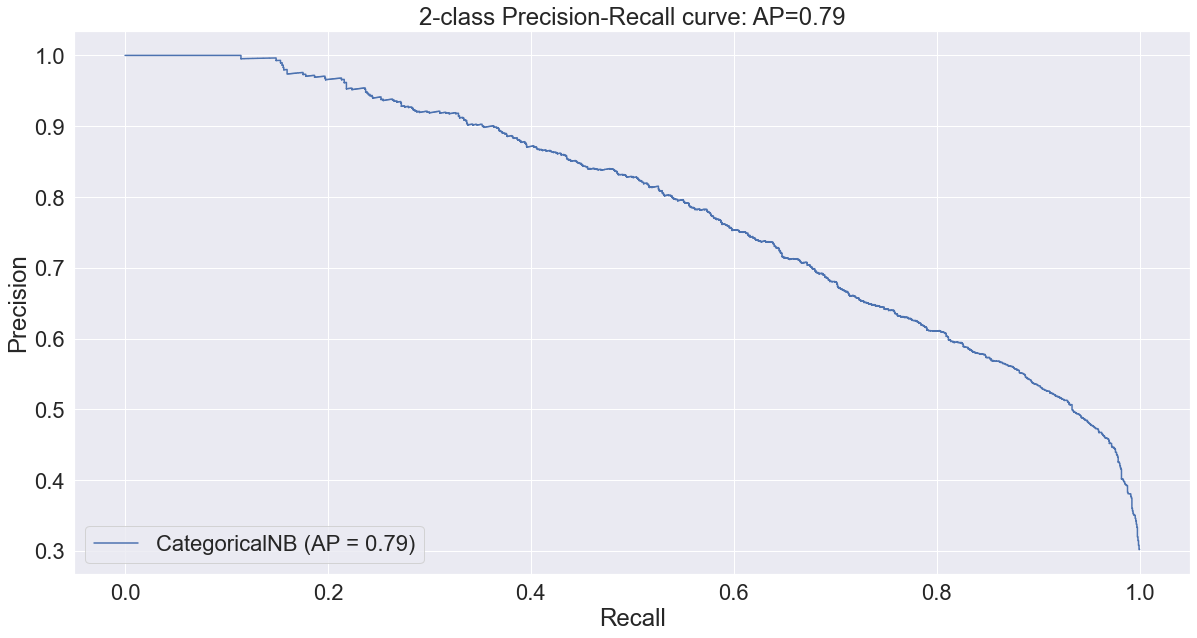

In [44]:
# Probability of all predictions
prob_50k = clf.predict_proba(X_test)[:,1]

average_precision = average_precision_score(y_test, prob_50k)
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

<h2> Conclusion </h2>

In the report, i showed that using the Gaussian Naive Bayes model had a lower accuracy score than the Categorical Naive Bayes model. This is because the Gaussian model is meant to handle continuous numeric data and the Categorical model is meant for categorical data. Because the dataset is almost all categorical data, using an algorithm meant for numeric data did not perform as well as the one meant for categorical data. There was also a significant difference in the Average Precision Recall between both models as well. <br> 
The Gaussian Model had an accuracy of 80.86%, APR of 67% <br>
The Categorical Model had an accuracy of 85.01%, APR of 79%